## 1. Data loading and understanding

### 1.1. Loading the datasets

In [61]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

positions = pd.read_csv("positions.csv")
education = pd.read_csv("education.csv")
job_seniority = pd.read_csv("jobtitle_seniority.csv")

### 1.2. Getting glimpse of data

In [62]:
positions.head()

,user_id,jobtitle,startdate,enddate
0,7jc+JKlKo7zUTk6YeqfvCrE8KztNWz3qNepQVJd0smgtpB...,delivery_driver,2005-03-01,2012-07-01
1,01QnCDXVlvzNAnyyDWf+ew4ZM3TcQvn1bQ/jHgHWG0kf/b...,ledelsesudvikling_coaching_og_psykisk_arbejdsm...,2014-04-01,2018-01-01
2,Cazq5pI2ol+qKuHNY0fSUw5+2cvffV/mNepQVJd0smgtpB...,project_technician,2012-06-01,2012-09-01
3,4qPM2d6reWpNwSQJ3NSQVw5+2cvffV/mNepQVJd0smgtpB...,telesales,2014-08-01,2015-03-01
4,0k6KOTrEedq2/2VzvQ6D8Q5+2cvffV/mNepQVJd0smgtpB...,mortgage_consultant,1990-08-01,1995-12-01


In [63]:
education.head()

,user_id,major,startdate,enddate
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Master of Viticulture,2006-01-01,2008-01-01
1,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Bachelor of horticulture,2001-01-01,2005-01-01
2,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,WSET Level 3,2015-01-01,2015-01-01
3,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Graduated Diploma,2008-01-01,2009-01-01
4,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,Lingüística Aplicada en la Enseñanza del Inglé...,2013-01-01,2016-01-01


In [64]:
job_seniority.head()

,user_id,jobtitle,seniority
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348
1,5NTieg1m6jKFiY8Py3K+2jr+/k0/DTn/+K+fv+DIJSUQ20...,emergency_room_physician_assistant_banner_chur...,2.866780
2,R58XldIpOAmT8Tt3/x+2/w5+2cvffV/mNepQVJd0smgtpB...,marketing_promotions,3.559404
3,Ks30ggQyMuLYOykWc4EoXGEWBgzjpZvPNepQVJd0smgtpB...,central_billing_assistant_development_manager,4.175832
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998


### 1.3. Checking number of observations

In [65]:
print("Positions data shape",positions.shape, "Unique users",len(positions.user_id.unique()))
print("Education data shape",education.shape, "Unique users", len(education.user_id.unique()))
print("Job seniority data shape",job_seniority.shape, "Unique users", len(job_seniority.user_id.unique()))

Positions data shape (377585, 4) Unique users 81464
Education data shape (226184, 4) Unique users 100000
Job seniority data shape (416295, 3) Unique users 100000


Since we only have data for 100k distinct users, hence we have duplicates in data which need to be identified and removed.

In [66]:
positions = positions.drop_duplicates()
education = education.drop_duplicates()
job_seniority = job_seniority.drop_duplicates()
print(positions.shape)
print(education.shape)
print(job_seniority.shape)

(377585, 4)
(210509, 4)
(416295, 3)


Only Education data had duplicate rows which have now been deleted. We still have more than 1 row/observation per user in all 3 dataframes.

### 1.4. Data cleaning and preparation

#### a) Sorting the Data 

Sorting Positions and Education data based on 'startdate' - would be helpful for age calculation later (to select first education date of bachelors) & Job_Seniority data on 'seniority'- would be helpful to get latest/present seniority value for a user

In [67]:
positions = positions.sort_values("startdate")
education = education.sort_values("startdate")
job_seniority = job_seniority.sort_values('seniority')

#### b) Education data seems a great start:

1- Has education information from all 100k users 

2- Seems a good identifier for age

In [68]:
education_comb = pd.DataFrame(education.groupby('user_id').agg(lambda x: x.tolist()))
education_comb.reset_index(inplace=True)
education_comb = education_comb.rename(columns = {'index':'user_id','startdate': 'Education_startdate','enddate': 'Education_enddate'})
print("Education data shape", education_comb.shape)
education_comb.head()

Education data shape (100000, 4)


,user_id,major,Education_startdate,Education_enddate
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,[BS],[1949-01-01],[1953-01-01]
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,"[BS in Electronics, nan]","[1973-01-01, 1984-01-01]","[1978-01-01, 1987-01-01]"
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,[Master Grande Ecole],[2013-01-01],[2016-01-01]
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,[Bachelor of Science (B.Sc.) (ED)],[2001-01-01],[2006-01-01]
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,"[BS, Master's Degree, nan]","[1996-01-01, 2008-01-01, 2012-01-01]","[1997-01-01, nan, 2013-01-01]"


#### c) Combining all data to a single dataframe

In [69]:
job_seniority_comb = pd.DataFrame(job_seniority.groupby('user_id').agg(lambda x: x.tolist()))
job_seniority_comb.reset_index(inplace=True)
job_seniority_comb = job_seniority_comb.rename(columns = {'index':'user_id'})

edu_comb_senior = pd.merge(education_comb,job_seniority_comb,on="user_id", how="left")

positions_comb = pd.DataFrame(positions.groupby('user_id').agg(lambda x: x.tolist()))
positions_comb.reset_index(inplace=True)
positions_comb = positions_comb.rename(columns = {'index':'user_id','startdate': 'Job_startdate','enddate': 'Job_enddate'})
positions_comb = positions_comb.drop(columns=['jobtitle'])

edu_comb_senior_pos = pd.merge(edu_comb_senior,positions_comb,on="user_id", how="left")
print(edu_comb_senior_pos.shape[0])
edu_comb_senior_pos.head()

100000


,user_id,major,Education_startdate,Education_enddate,jobtitle,seniority,Job_startdate,Job_enddate
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,[BS],[1949-01-01],[1953-01-01],[former_owner_presently_consultant],[7.064816820832929],[1953-01-01],[nan]
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,"[BS in Electronics, nan]","[1973-01-01, 1984-01-01]","[1978-01-01, 1987-01-01]",[design_engineer_|_mechanical_industrial_engin...,"[3.331506849315069, 7.3342465753424655]","[1984-10-01, 1993-06-01]","[1989-05-01, nan]"
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,[Master Grande Ecole],[2013-01-01],[2016-01-01],"[event_promoter_public_relations, sales_busine...","[1.9083560511827489, 3.439383561643836, 3.7874...","[2014-06-01, 2015-07-01, 2016-07-01, 2016-11-0...","[2014-08-01, 2015-08-01, 2016-10-01, 2017-05-0..."
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,[Bachelor of Science (B.Sc.) (ED)],[2001-01-01],[2006-01-01],"[network_specialist, center_manager_faculty_|_...","[3.9283600932573526, 5.0027397260273965]","[2009-07-01, nan]","[2011-10-01, nan]"
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,"[BS, Master's Degree, nan]","[1996-01-01, 2008-01-01, 2012-01-01]","[1997-01-01, nan, 2013-01-01]","[substitute_teacher, validation_scientist_bris...","[2.039746473113883, 2.7506849315068487, 2.8553...","[1997-12-01, 1999-09-01, 2004-09-01, 2005-05-0...","[1998-12-01, 2003-12-01, 2005-05-01, 2007-09-0..."


## 2. Feature Engineering

### 1. Create Present Seniority column

Since we had initally sorted the job_seniority data by senioiry values, hence the seniority values list for a user is in increasing order. The 'Present_Seniority' value will be equal to the last entry in the seniority values list for a user.

### 2. Create Work- Ex (in years) column 

Assumption: no job breaks/ unemployed  

if job start date is not null then only:

    if last elemnt of job end date is nan:
         job start date difference with today

    else:
          job start date difference with job end date

else:
   cant calculate 
   
   
### 3. Create number of jobs/positions column

It will be equal to the length of 'jobtitle' column value for each user

### 4. Create Number of degrees column

It will be equal to the length of 'major' column value for each user

In [70]:
edu_comb_senior_pos["Present_Seniority"] = -1.76543  # initialize to any random value
edu_comb_senior_pos["Work-ex"] = 0
edu_comb_senior_pos["Number_of_degrees"] = 0
edu_comb_senior_pos["Number_of_roles"] = 0

count_we = 0
today = date.today()

for i in range(len(edu_comb_senior_pos)):
    edu_comb_senior_pos["Number_of_degrees"][i] = len(edu_comb_senior_pos["major"][i])
    edu_comb_senior_pos["Number_of_roles"][i] = len(edu_comb_senior_pos["jobtitle"][i])
    edu_comb_senior_pos["Present_Seniority"][i]= edu_comb_senior_pos.seniority[i][-1]

    if not isinstance(edu_comb_senior_pos["Job_startdate"][i], float):
        if not pd.isna(edu_comb_senior_pos["Job_startdate"][i][0]):
            if pd.isnull(edu_comb_senior_pos["Job_enddate"][i][-1]):
                edu_comb_senior_pos["Work-ex"][i] = relativedelta(today, pd.to_datetime(edu_comb_senior_pos["Job_startdate"][i][0])).years
                count_we += 1
            else:
                edu_comb_senior_pos["Work-ex"][i] = relativedelta(pd.to_datetime(edu_comb_senior_pos["Job_enddate"][i][-1]), pd.to_datetime(edu_comb_senior_pos["Job_startdate"][i][0])).years
                count_we += 1
     
print("Users included with valid values in work-experience column", count_we)

Users included with valid values in work-experience column 79205


In [71]:
edu_comb_senior_pos.head()

,user_id,major,Education_startdate,Education_enddate,jobtitle,seniority,Job_startdate,Job_enddate,Present_Seniority,Work-ex,Number_of_degrees,Number_of_roles
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,[BS],[1949-01-01],[1953-01-01],[former_owner_presently_consultant],[7.064816820832929],[1953-01-01],[nan],7.064817,69,1,1
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,"[BS in Electronics, nan]","[1973-01-01, 1984-01-01]","[1978-01-01, 1987-01-01]",[design_engineer_|_mechanical_industrial_engin...,"[3.331506849315069, 7.3342465753424655]","[1984-10-01, 1993-06-01]","[1989-05-01, nan]",7.334247,37,2,2
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,[Master Grande Ecole],[2013-01-01],[2016-01-01],"[event_promoter_public_relations, sales_busine...","[1.9083560511827489, 3.439383561643836, 3.7874...","[2014-06-01, 2015-07-01, 2016-07-01, 2016-11-0...","[2014-08-01, 2015-08-01, 2016-10-01, 2017-05-0...",4.307247,7,1,9
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,[Bachelor of Science (B.Sc.) (ED)],[2001-01-01],[2006-01-01],"[network_specialist, center_manager_faculty_|_...","[3.9283600932573526, 5.0027397260273965]","[2009-07-01, nan]","[2011-10-01, nan]",5.002740,12,1,2
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,"[BS, Master's Degree, nan]","[1996-01-01, 2008-01-01, 2012-01-01]","[1997-01-01, nan, 2013-01-01]","[substitute_teacher, validation_scientist_bris...","[2.039746473113883, 2.7506849315068487, 2.8553...","[1997-12-01, 1999-09-01, 2004-09-01, 2005-05-0...","[1998-12-01, 2003-12-01, 2005-05-01, 2007-09-0...",7.421538,24,3,8


## 3. Train data Age calculation

The starting date of pursuing Bachelors degree is a good proxy for present age. Hence, creating a subset dataframe of users who have either Education_start date or Education_enddate value and have provided bachelors' degree information.

* Bachelors data includes users whose 'Major' starts with 'B' or 'b' for Bachelor's degree. Here the sorting of starting date helps as the first entry of a person with say 2 entries in the education data with BS and MS degrees has BS as the first entry in the clean data.

* In addition to above, I have also included those users who have more than 1 entry in the 'Major' column. Assuming if 2 education majors mentioned by user, then the first is the bachelors degree. For e.g. For a user X, 'Major' column looks like: [nan,'MS'] This is a case when the first entry is very likely for Bachelors degree. 

* With this addition, I was able to get .... more users data into the bachelors dataframe.

In [74]:
bachelors = pd.DataFrame()
bach_asssumed = pd.DataFrame()
count1 = 0
count2 = 0
for i in range(len(edu_comb_senior_pos)):
    if not pd.isnull(edu_comb_senior_pos["Education_startdate"][i][0]) or not pd.isnull(edu_comb_senior_pos["Education_enddate"][i][0]):
    
        if len(edu_comb_senior_pos["major"][i])==1:
            if not pd.isna(edu_comb_senior_pos["major"][i]):
                if edu_comb_senior_pos["major"][i][0].startswith("B") | edu_comb_senior_pos["major"][i][0].startswith("b"):
                    bachelors = bachelors.append(edu_comb_senior_pos.iloc[i:i+1,:])
                    count2 += 1        
        elif len(edu_comb_senior_pos["major"][i])>1:
            if not pd.isna(edu_comb_senior_pos["major"][i][0]):
                if edu_comb_senior_pos["major"][i][0].startswith("B") | edu_comb_senior_pos["major"][i][0].startswith("b"):
                    bachelors = bachelors.append(edu_comb_senior_pos.iloc[i:i+1,:])
                    count2 += 1  
                else:            
                    bachelors = bachelors.append(edu_comb_senior_pos.iloc[i:i+1,:])
                    bach_asssumed = bach_asssumed.append(edu_comb_senior_pos.iloc[i:i+1,:])
                    count1 += 1

            else:
                bachelors = bachelors.append(edu_comb_senior_pos.iloc[i:i+1,:])
                bach_asssumed = bach_asssumed.append(edu_comb_senior_pos.iloc[i:i+1,:])
                count1 += 1
            
print("Bachelors data shape",bachelors.shape)      
print("Users included with B/b as Major starting char", count2)
print("Users included with length of 'Major'>1", count1)
bachelors.head()

Bachelors data shape (76592, 12)
Users included with B/b as Major starting char 33186
Users included with length of 'Major'>1 43406


,user_id,major,Education_startdate,Education_enddate,jobtitle,seniority,Job_startdate,Job_enddate,Present_Seniority,Work-ex,Number_of_degrees,Number_of_roles
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,[BS],[1949-01-01],[1953-01-01],[former_owner_presently_consultant],[7.064816820832929],[1953-01-01],[nan],7.064817,69,1,1
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,"[BS in Electronics, nan]","[1973-01-01, 1984-01-01]","[1978-01-01, 1987-01-01]",[design_engineer_|_mechanical_industrial_engin...,"[3.331506849315069, 7.3342465753424655]","[1984-10-01, 1993-06-01]","[1989-05-01, nan]",7.334247,37,2,2
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,[Bachelor of Science (B.Sc.) (ED)],[2001-01-01],[2006-01-01],"[network_specialist, center_manager_faculty_|_...","[3.9283600932573526, 5.0027397260273965]","[2009-07-01, nan]","[2011-10-01, nan]",5.002740,12,1,2
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,"[BS, Master's Degree, nan]","[1996-01-01, 2008-01-01, 2012-01-01]","[1997-01-01, nan, 2013-01-01]","[substitute_teacher, validation_scientist_bris...","[2.039746473113883, 2.7506849315068487, 2.8553...","[1997-12-01, 1999-09-01, 2004-09-01, 2005-05-0...","[1998-12-01, 2003-12-01, 2005-05-01, 2007-09-0...",7.421538,24,3,8
5,++8qqHNDQSyp1Yd45ROBZg5+2cvffV/mNepQVJd0smgtpB...,"[HHX, Bachelor (BA), Master (Cand.mag.), nan, ...","[2000-01-01, 2004-01-01, 2009-01-01, 2011-01-0...","[2003-01-01, 2006-01-01, 2011-01-01, 2011-01-0...","[sports_reporter_|_media_production, advisor_r...","[2.584931506849315, 3.0027397260273974, 3.0904...","[2000-01-01, 2003-08-01, 2005-01-01, 2005-07-0...","[2002-01-01, 2004-07-01, 2007-01-01, 2012-12-0...",5.927184,22,5,12


In [76]:
bach_asssumed.head(10)

,user_id,major,Education_startdate,Education_enddate,jobtitle,seniority,Job_startdate,Job_enddate,Present_Seniority,Work-ex,Number_of_degrees,Number_of_roles
5,++8qqHNDQSyp1Yd45ROBZg5+2cvffV/mNepQVJd0smgtpB...,"[HHX, Bachelor (BA), Master (Cand.mag.), nan, ...","[2000-01-01, 2004-01-01, 2009-01-01, 2011-01-0...","[2003-01-01, 2006-01-01, 2011-01-01, 2011-01-0...","[sports_reporter_|_media_production, advisor_r...","[2.584931506849315, 3.0027397260273974, 3.0904...","[2000-01-01, 2003-08-01, 2005-01-01, 2005-07-0...","[2002-01-01, 2004-07-01, 2007-01-01, 2012-12-0...",5.927184,22,5,12
8,++CkXwiKizxr2GskQ2eBvw5+2cvffV/mNepQVJd0smgtpB...,"[nan, Laurea triennale, Laurea Specialistica, ...","[2002-01-01, 2008-01-01, 2012-01-01, 2016-01-01]","[2007-01-01, 2012-01-01, 2015-01-01, nan]","[tutor_dsa, tirocinio_post_lauream_presso_unit...","[1.5418068319750304, 2.582191780821918]","[2014-09-01, 2016-05-01]","[2015-09-01, nan]",2.582192,7,4,2
10,++EXELjlzUMiVMo6BQUadQ5+2cvffV/mNepQVJd0smgtpB...,"[nan, Magister]","[2008-01-01, 2011-01-01]","[2011-01-01, 2013-01-01]","[magazynier, motywator, operator_wózka_widłowe...","[3.40547634826556, 3.848326567742044, 7.002739...","[2008-06-01, 2010-09-01, 2011-01-01, 2011-07-0...","[2011-11-01, 2010-12-01, 2011-03-01, 2011-10-0...",7.605306,13,2,4
11,++NWXZ8bW3I7VaXV77eiwA5+2cvffV/mNepQVJd0smgtpB...,"[nan, Engenheiro Ambiental, nan]","[2004-01-01, 2006-01-01, 2010-01-01]","[2005-01-01, 2009-01-01, 2012-01-01]","[educador_ambiental, engenheiro_de_segurança_t...","[2.9470151886957443, 3.017413066385669, 3.0174...",NaN,NaN,4.001370,0,3,6
14,++RMgFSqmuf+dN+z7ywy5g5+2cvffV/mNepQVJd0smgtpB...,"[licenciatura, Erasmus]","[1997-01-01, 2000-01-01]","[2003-01-01, 2001-01-01]","[designer_creative, sócio_proprietário]","[3.84411842663274, 5.4459196518091515]","[2010-06-01, 2010-06-01, 2018-03-01]","[nan, 2017-01-01, nan]",5.445920,11,2,2
21,++XYE+5zBPkZwelWdYHitHAG1BvSkUYANepQVJd0smgtpB...,"[nan, DIPLOMADO EN CONTABILIDAD GUBERNAMENTAL,...","[1997-01-01, 2015-01-01, 2016-01-01, 2016-01-01]","[2001-01-01, 2016-01-01, 2016-01-01, 2016-01-01]","[coordinadora_de_ingresos, contabilidad, conta...","[2.671232876712329, 3.583567087059419, 4.57670...","[2003-07-01, 2012-12-01, 2015-10-01]","[2010-08-01, 2015-04-01, nan]",4.576706,18,4,3
22,++XeXMfCvvipGArUN9ovGw5+2cvffV/mNepQVJd0smgtpB...,"[nan, nan, Executive MBA, Traducir la Creativi...","[1993-01-01, 2001-01-01, 2007-01-01, 2014-01-01]","[1999-01-01, 2002-01-01, 2008-01-01, 2014-01-01]","[quality_technical_|_food_production, bakery_m...","[2.806392694063927, 4.056956374182402, 4.30724...","[1995-06-01, 1999-01-01, 2006-09-01, 2009-01-0...","[1995-09-01, 2006-09-01, 2009-08-01, nan, 2014...",5.233530,26,4,7
26,++bfDB2Ys/jvq1t5QkkT6A4ZM3TcQvn1bQ/jHgHWG0kf/b...,"[Marketing, nan, nan]","[2007-01-01, 2009-01-01, 2009-01-01]","[2009-01-01, 2009-01-01, 2011-01-01]","[sales_associate_|_retail, marketing_assistant...","[1.0849315068493153, 1.5835616438356164, 1.719...","[2009-03-01, 2009-03-01, 2009-07-01, 2010-06-0...","[2009-07-01, 2009-07-01, 2010-02-01, 2010-09-0...",5.042583,13,3,11
28,++danWjua+2ejaEieEVUcQ5+2cvffV/mNepQVJd0smgtpB...,"[Civilekonom, Dipl. Bindvävsmassör, nan, nan]","[1985-01-01, 1992-01-01, 2001-01-01, 2010-01-01]","[1989-01-01, 1995-01-01, 2002-01-01, 2012-01-01]","[ekonom, ägare]","[4.407348134592998, 4.656168167810139]","[1993-10-01, 2003-09-01, 2009-01-01, 2013-12-01]","[nan, 2008-12-01, 2013-12-01, nan]",4.656168,28,4,2
29,++ezojV5y6oN+zgZrWd8Rw+/8VEIFuQmbQ/jHgHWG0kf/b...,"[nan, Bachelor of Science (B.S.), Doctor of Ve...","[2006-01-01, 2009-01-01, 2012-01-01]","[2009-01-01, 2012-01-01, 2016-01-01]","[intern, andover_annual_fund_student_caller, d...","[0.6155590522028878, 0.9087247227658188, 1.855...","[2007-03-01, 2007-06-01, 2007-06-01, 2008-06-0...","[2008-03-01, 2012-08-01, 2008-06-01, 2012-08-0...",3.679207,8,3,7


#### Assumption: 

I have also included those users who have more than 1 entry in the 'Major' column. Assuming if 2 education majors mentioned by user, then the first is the bachelors degree. For e.g. For a user X, 'Major' column looks like: [nan,'MS'] This is a case when the first entry is very likely for Bachelors degree. 

#### Arguments In favour 

* Inżynier (Inż.) = Engineering -> 4years (obs 39)

* Laurea triennale = Bachelor's degree (obs 8)

* Magister = Master's degree (obs 10)

* Marketing - 4 years - most likely bachelors (obs 26)

#### Ambiguous 

* licenciatura = Degree (obs 14)

* 4 years for nan - most likely bachelors (obs 21, 22-many years)

* Civilekonom - Masters' degree - 4 years? (obs 28)

#### Not in favour

* Engenheiro Ambiental = Environment Engineer (obs 11)

* HHX = Upper secondary education program (obs 5)


* Now, we can calculate the present age from the difference with today's date and Bachelor's starting date(usually 17 then). The age calculation this way misses out the case when a person might have worked before starting to pursue his/hers Bachelor's degree. But to accomodate the case when a person might have worked before pursuing a BS/BA degree is tricky as that job might be a part-time work during high school. Therefore, it seems reasonable to go ahead with the assumtion every user has gone ahead to university after high school at the age of 17. 

* In case where Bachelor's start date is not mentioned, I take Bachelor's degree end date to the be time when user is 20 years old.

* For cases, where both Bachelor's start and end date are not mentioned, I have put 'Age' column value as 0

In [77]:
bachelors.reset_index(inplace=True)
bachelors = bachelors.drop(columns=['index'])
bachelors["Age"] = 18
bachelors.head()

,user_id,major,Education_startdate,Education_enddate,jobtitle,seniority,Job_startdate,Job_enddate,Present_Seniority,Work-ex,Number_of_degrees,Number_of_roles,Age
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,[BS],[1949-01-01],[1953-01-01],[former_owner_presently_consultant],[7.064816820832929],[1953-01-01],[nan],7.064817,69,1,1,18
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,"[BS in Electronics, nan]","[1973-01-01, 1984-01-01]","[1978-01-01, 1987-01-01]",[design_engineer_|_mechanical_industrial_engin...,"[3.331506849315069, 7.3342465753424655]","[1984-10-01, 1993-06-01]","[1989-05-01, nan]",7.334247,37,2,2,18
2,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,[Bachelor of Science (B.Sc.) (ED)],[2001-01-01],[2006-01-01],"[network_specialist, center_manager_faculty_|_...","[3.9283600932573526, 5.0027397260273965]","[2009-07-01, nan]","[2011-10-01, nan]",5.002740,12,1,2,18
3,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,"[BS, Master's Degree, nan]","[1996-01-01, 2008-01-01, 2012-01-01]","[1997-01-01, nan, 2013-01-01]","[substitute_teacher, validation_scientist_bris...","[2.039746473113883, 2.7506849315068487, 2.8553...","[1997-12-01, 1999-09-01, 2004-09-01, 2005-05-0...","[1998-12-01, 2003-12-01, 2005-05-01, 2007-09-0...",7.421538,24,3,8,18
4,++8qqHNDQSyp1Yd45ROBZg5+2cvffV/mNepQVJd0smgtpB...,"[HHX, Bachelor (BA), Master (Cand.mag.), nan, ...","[2000-01-01, 2004-01-01, 2009-01-01, 2011-01-0...","[2003-01-01, 2006-01-01, 2011-01-01, 2011-01-0...","[sports_reporter_|_media_production, advisor_r...","[2.584931506849315, 3.0027397260273974, 3.0904...","[2000-01-01, 2003-08-01, 2005-01-01, 2005-07-0...","[2002-01-01, 2004-07-01, 2007-01-01, 2012-12-0...",5.927184,22,5,12,18


In [78]:
from datetime import date
from dateutil.relativedelta import relativedelta

today = date.today()
count3 = 0
count4 = 0
count5 = 0

no_edu_date = pd.DataFrame()

for i in range(len(bachelors)):
    #print(i)
    if not pd.isnull(bachelors["Education_startdate"][i][0]):
        bachelors["Age"][i] += relativedelta(today, pd.to_datetime(bachelors["Education_startdate"][i][0])).years
        count3 += 1
    else:
        if not pd.isnull(bachelors["Education_enddate"][i][0]):
   
            bachelors["Age"][i] += 4 + relativedelta(today, pd.to_datetime(bachelors["Education_enddate"][i][0])).years
            count4 += 1
        else:  
            bachelors["Age"][i] = 0
            no_edu_date = no_edu_date.append(bachelors.iloc[i:i+1,:])
            count5 += 1

print("Total users in bachelors data", bachelors.shape[0])
print("Users with bachelors' degree start date mentioned", count3)
print("Users with bachelors' degree start date not mentioned but enddate mentioned", count4)
print("Users with bachelors' degree start & end date both not mentioned", count5)
bachelors.head() 

Total users in bachelors data 76592
Users with bachelors' degree start date mentioned 76091
Users with bachelors' degree start date not mentioned but enddate mentioned 501
Users with bachelors' degree start & end date both not mentioned 0


,user_id,major,Education_startdate,Education_enddate,jobtitle,seniority,Job_startdate,Job_enddate,Present_Seniority,Work-ex,Number_of_degrees,Number_of_roles,Age
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,[BS],[1949-01-01],[1953-01-01],[former_owner_presently_consultant],[7.064816820832929],[1953-01-01],[nan],7.064817,69,1,1,91
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,"[BS in Electronics, nan]","[1973-01-01, 1984-01-01]","[1978-01-01, 1987-01-01]",[design_engineer_|_mechanical_industrial_engin...,"[3.331506849315069, 7.3342465753424655]","[1984-10-01, 1993-06-01]","[1989-05-01, nan]",7.334247,37,2,2,67
2,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,[Bachelor of Science (B.Sc.) (ED)],[2001-01-01],[2006-01-01],"[network_specialist, center_manager_faculty_|_...","[3.9283600932573526, 5.0027397260273965]","[2009-07-01, nan]","[2011-10-01, nan]",5.002740,12,1,2,39
3,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,"[BS, Master's Degree, nan]","[1996-01-01, 2008-01-01, 2012-01-01]","[1997-01-01, nan, 2013-01-01]","[substitute_teacher, validation_scientist_bris...","[2.039746473113883, 2.7506849315068487, 2.8553...","[1997-12-01, 1999-09-01, 2004-09-01, 2005-05-0...","[1998-12-01, 2003-12-01, 2005-05-01, 2007-09-0...",7.421538,24,3,8,44
4,++8qqHNDQSyp1Yd45ROBZg5+2cvffV/mNepQVJd0smgtpB...,"[HHX, Bachelor (BA), Master (Cand.mag.), nan, ...","[2000-01-01, 2004-01-01, 2009-01-01, 2011-01-0...","[2003-01-01, 2006-01-01, 2011-01-01, 2011-01-0...","[sports_reporter_|_media_production, advisor_r...","[2.584931506849315, 3.0027397260273974, 3.0904...","[2000-01-01, 2003-08-01, 2005-01-01, 2005-07-0...","[2002-01-01, 2004-07-01, 2007-01-01, 2012-12-0...",5.927184,22,5,12,40


## 4. Modeling & Predictions

###  Model Selection

* Covariates: 
       1) Present Seniority
       2) Work-exp
       3) Number of roles
       4) Number of degrees

* Outcome: 
       1) Age

This is a Regression Problem.

We can tackle a regression problem using many algorithm. Following presents a discussion on which suits best for our case.

* Multiple linear regression - 
                 1) sensitive to outliers as it depends on the least squares minimization technique 
                 2) unable to handle multi-collinearity issue                        
                 3) great interpretability
                 
* Penalized Regression models such as Ridge/Lasso/Elastic Net -
                 1) sensitive to outliers as it stills depends on the least squares minimization technique 
                 2) able to handle multi-collinearity issue                        
                 3) Does not provide any information on variable significance

* Decision Tree -
                 1) immune to multicollinearity by nature
                 2) robust to outliers
                 3) great interpretability

* Random Forest -
                 1) immune to multicollinearity by nature
                 2) robust to outliers
                 3) limited interpretability 
                 4) ensembling method - better predictions

Hence, I will use Random Forest model for the task of Age prediction using the 4 covariates.

In [155]:
# Train data with 4 covariates

bachelors['True_or_Predicted'] = 'True'
train = bachelors[['Present_Seniority', 'Work-ex','Number_of_degrees','Number_of_roles' ,'Age']]
print(train.shape)
train.head()

(76592, 5)


,Present_Seniority,Work-ex,Number_of_degrees,Number_of_roles,Age
0,7.064817,69,1,1,91
1,7.334247,37,2,2,67
2,5.002740,12,1,2,39
3,7.421538,24,3,8,44
4,5.927184,22,5,12,40


In [156]:
# Test data (all user data - train data) with 4 covariates

df = pd.merge(edu_comb_senior_pos,t,on=['user_id'],how="outer",indicator=True)
df = df[df['_merge']=='left_only']
df = df[['user_id', 'major_x', 'Education_startdate_x', 'Education_enddate_x',
       'jobtitle_x', 'seniority_x', 'Job_startdate_x', 'Job_enddate_x',
       'Present_Seniority_x', 'Work-ex_x', 'Number_of_degrees_x',
       'Number_of_roles_x']]
df = df.rename(columns={"major_x": "major", "Education_startdate_x": "Education_startdate","Education_enddate_x":"Education_enddate",
                        "jobtitle_x":"jobtitle",
                        "seniority_x":"seniority","Job_startdate_x":"Job_startdate","Job_enddate_x":"Job_enddate",
                        "Present_Seniority_x":"Present_Seniority","Work-ex_x":"Work-ex",
                       "Number_of_degrees_x":"Number_of_degrees","Number_of_roles_x":"Number_of_roles"})
test = df[['Present_Seniority', 'Work-ex','Number_of_degrees','Number_of_roles' ]]

print(test.shape)
test.head()

(23408, 4)


,Present_Seniority,Work-ex,Number_of_degrees,Number_of_roles
2,4.307247,7,1,9
7,8.345205,7,1,5
9,4.496525,14,1,1
19,5.789041,13,1,3
20,5.266336,27,1,3


In [131]:
import numpy as np

# Labels are the values we want to predict
labels = np.array(train['Age'])

# Remove the labels from the features and Convert to numpy array
features = train.drop('Age', axis = 1)
test_features = test

features = np.array(features)
test_features = np.array(test_features)

# Saving feature names for later use
feature_list = list(train.columns)

In [133]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 50 decision trees
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)

# Train the model on training data
rf.fit(features, labels)

In [165]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
train_pred = rf.predict(features)

# Calculate the absolute errors
errors = abs(train_pred - labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'years')

Mean Absolute Error: 2.82 years


The model fits well on the train data hence, we can go ahead with its prediction for the test set

In [144]:
df['Age'] = predictions
df['True_or_Predicted'] = "Predicted"
df.head()

,user_id,major,Education_startdate,Education_enddate,jobtitle,seniority,Job_startdate,Job_enddate,Present_Seniority,Work-ex,Number_of_degrees,Number_of_roles,Age,True_or_Predicted
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,[Master Grande Ecole],[2013-01-01],[2016-01-01],"[event_promoter_public_relations, sales_busine...","[1.9083560511827489, 3.439383561643836, 3.7874...","[2014-06-01, 2015-07-01, 2016-07-01, 2016-11-0...","[2014-08-01, 2015-08-01, 2016-10-01, 2017-05-0...",4.307247,7,1,9,29.640,Predicted
7,++Bu40VW3TpqnNRejHUsow5+2cvffV/mNepQVJd0smgtpB...,[Master of Science (MSc)],[2010-01-01],[2016-01-01],[electrical_design_engineer_intern_|_oil_energ...,"[2.3321917808219177, 2.5424657534246577, 5.750...","[2015-01-01, 2016-05-01, 2017-01-01, 2017-01-0...","[2015-06-01, 2017-01-01, 2017-12-01, 2017-06-0...",8.345205,7,1,5,30.860,Predicted
9,++E9PyTRs1v7rNQOa7JJKQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,[Master of Science],[2003-01-01],[2009-12-31],[reservoir_engineer],[4.496525099841112],[2007-05-01],[nan],4.496525,14,1,1,39.700,Predicted
19,++WZyqFWZRHYw7/i9E9vNL4xbHqlXxy8NepQVJd0smgtpB...,[Staatlich geprüfter Techniker Elektro-/Inform...,[2008-07-01],[2012-06-01],"[fachplaner_elektrotechnik, fachplaner_projekt...","[4.144821059022777, 5.29032982326361, 5.789041...","[2008-07-01, 2011-09-01, nan]","[2011-08-01, nan, nan]",5.789041,13,1,3,37.385,Predicted
20,++XOt+UqpCnbnNoSx+ZCYQ5+2cvffV/mNepQVJd0smgtpB...,[edificação],[1968-01-01],[1970-01-01],"[projetista, sócio_proprietario, sócio_gerente]","[3.543962453264877, 4.972982871092817, 5.26633...","[1983-06-01, 1983-09-01, 2009-01-01]","[nan, 2011-02-01, 2011-02-01]",5.266336,27,1,3,49.540,Predicted


## 5. Result Compilation

In [147]:
result = pd.DataFrame()

result = pd.concat([df[['user_id','Age','True_or_Predicted']],bachelors[['user_id','Age','True_or_Predicted']]])

print(result.shape)
result.head()

(100000, 3)


,user_id,Age,True_or_Predicted
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,29.640,Predicted
7,++Bu40VW3TpqnNRejHUsow5+2cvffV/mNepQVJd0smgtpB...,30.860,Predicted
9,++E9PyTRs1v7rNQOa7JJKQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,39.700,Predicted
19,++WZyqFWZRHYw7/i9E9vNL4xbHqlXxy8NepQVJd0smgtpB...,37.385,Predicted
20,++XOt+UqpCnbnNoSx+ZCYQ5+2cvffV/mNepQVJd0smgtpB...,49.540,Predicted


## 6. Extra 

### Job titles word cloud for high & low seniority values


Identifying job titles that are highly indictive of the seniority value can prove to be very helpful in analysis.

From the job_seniority data, dropping duplicate job title rows and checking for the range of spread of seniority value to identify the low and high range.

In [158]:
df2 = job_seniority.drop_duplicates(subset=["jobtitle"], keep='first')
print("Min seniority value",min(df2["seniority"]))
print("Max seniority value", max(df2["seniority"]))

Min seniority value 0.084931506849315
Max seniority value 29.186301369863013


#### Visualizing the distribution of seniority values

<AxesSubplot:xlabel='seniority'>

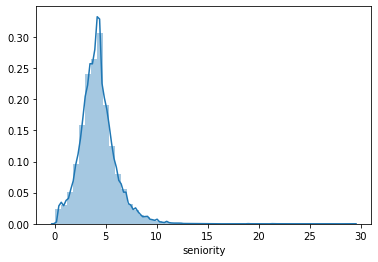

In [163]:
import seaborn as sns
sns.distplot(df2['seniority'])

In [160]:
# Considering high seniority job title to be ones with seniority > 15

high = df2.loc[(df2['seniority'] >= 15)] 
print("Number of job titles with High seniority value",high.shape[0])
high.head()

Number of job titles with High seniority value 179


,user_id,jobtitle,seniority
336004,B70vWYq4kn8jnoJmz1dQ0A5+2cvffV/mNepQVJd0smgtpB...,shareholder_|_accounting,15.010959
33749,QejYJiK7x/Ph54KDF0fMQg5+2cvffV/mNepQVJd0smgtpB...,retired_cfo,15.098920
40489,5qPXr1WO6fDDTUGhnNEoqQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,retired_managing_director,15.160447
75276,sqKLBeKJhpsFRAFvME9xkw4ZM3TcQvn1bQ/jHgHWG0kf/b...,major_retired_|_military,15.179452
249424,qK6kprqpyVEoVid+AyssnQ5+2cvffV/mNepQVJd0smgtpB...,board_member_|_industrial_automation,15.263014


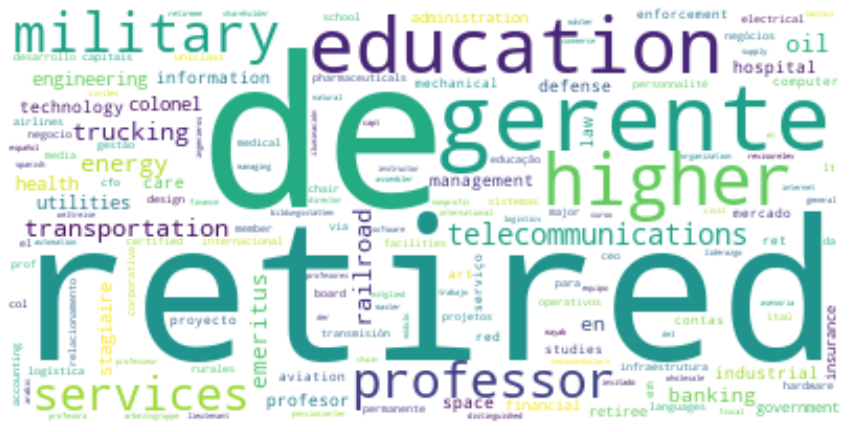

In [153]:
text = []
for i in range(len(high)):
    if not pd.isnull(high.iloc[i,1]):
        high.iloc[i,1] = high.iloc[i,1].replace('_', ' ')
        text.append(high.iloc[i,1].split(" | "))

text=[' '.join(t) for t in text]

s = text[0]
for i in range(1, len(text)):
    s +=" "+text[i]

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100, max_words=150, background_color="white",collocations = False).generate(s)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()    

From the word cloud, we can identify that job titles including terms such as "retired", "gerente(Manager in English","professor", "military" have high seniority values which matches our expectation.

In [161]:
# Considering low seniority job title to be ones with seniority < 1

low = df2.loc[(df2['seniority'] < 1)] 
print("Number of job titles with Low seniority value",low.shape[0])
low.head()

Number of job titles with Low seniority value 5621


,user_id,jobtitle,seniority
121118,KsJMoMDsgKiHND/WX5jNKw5+2cvffV/mNepQVJd0smgtpB...,internee_process_south_|_oil_energy,0.084932
381973,NeIzRrcDGsIX4+fXj5pJNg5+2cvffV/mNepQVJd0smgtpB...,internee_|_oil_energy,0.084932
364708,hvh3iCLca1kV/fasr9FFIQ5+2cvffV/mNepQVJd0smgtpB...,ingegnere_pipeline_|_oil_energy,0.084932
333917,xXBctgQViJs6T+105cOI+A5+2cvffV/mNepQVJd0smgtpB...,ingeniero_de_yacimientos_de_eeii_|_oil_energy,0.084932
325469,KsJMoMDsgKiHND/WX5jNKw5+2cvffV/mNepQVJd0smgtpB...,internee_msc_project_|_oil_energy,0.084932


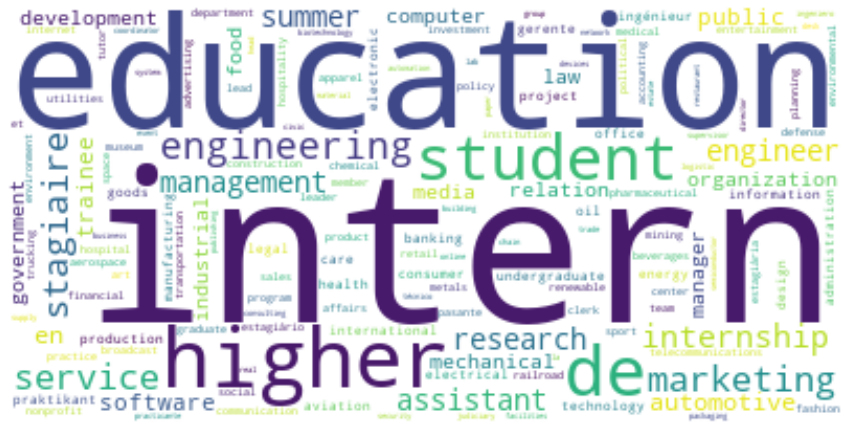

In [154]:
text2 = []
for i in range(len(low)):
    if not pd.isnull(low.iloc[i,1]):
        low.iloc[i,1] = low.iloc[i,1].replace('_', ' ')
        text2.append(low.iloc[i,1].split(" | "))

text2=[' '.join(t) for t in text2]

s2 = text2[0]
for i in range(1, len(text2)):
    s2 +=" "+text2[i]

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100, max_words=150, background_color="white",collocations = False).generate(s2)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()    

From the word cloud, we can identify that job titles including terms such as "intern", "education","professor", "student" have low seniority values which matches our expectation.

### Other ideas:

#### 1.Seniority threshold 

To use job start date, keep threshold on seniority to avoid any jobs before turning 21 & use the first job of more than threshold to calculate age (starting 21)

#### 2. Converting dates to Modified Julian Day (MJD) format 

Great way to analyze data with date values. Converts the dates into continuous value (count of days since the beginning of the Julian period).

#### 3. Presently, bachelor's start date assumed to be edu_start date when length 'major'>2:

We can consider bachelor degree start date to be the date corresponding to the degree starting with B/b instead of simply selecting the first education major start date as that date may correspond to some high school degree/diploma and not BS/BA degree.

In [164]:
result.to_csv('out.csv') 